# Intoduction to SCikit Learn:

### What are we going to cover in this notebook?
0. An end-to-end Scikit-Learn worfklow
1. Getting the data ready
2. Choosing the right maching learning estimator/aglorithm/model for your problem
3. Fitting your chosen machine learning model to data and using it to make a prediction
4. Evaluting a machine learning model
5. Improving predictions through experimentation (hyperparameter tuning)
6. Saving and loading a pretrained model
7. Putting it all together in a pipeline

In [4]:
what_we_are_covering = [
'0. An end-to-end Scikit-Learn worfklow',
'1. Getting the data ready',
'2. Choosing the right maching learning estimator/aglorithm/model for your problem',
'3. Fitting your chosen machine learning model to data and using it to make a prediction',
'4. Evaluting a machine learning model',
'5. Improving predictions through experimentation (hyperparameter tuning)',
'6. Saving and loading a pretrained model',
'7. Putting it all together in a pipeline'
]

In [5]:
# Standard imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Getting our data ready to be used with machine learning

Three main things to do:

    1. Split the data into features and labels (Training, test sets - Usually X and y)
    2. Filling (Imputing) or disregarding missing values
    3. Converting non-numerical values into numerical values (Feature encoding)
    
Clean Data -----> Transform Data -----> Reduce Data

In [6]:
heart_disease_data = pd.read_csv("heart-disease.csv")
heart_disease_data.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [7]:
X = heart_disease_data.drop("target", axis=1)
X.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  
0   0     1  
1   0     2  
2   0     2  
3   0     2  
4   0     2

In [8]:
y = heart_disease_data.target
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [9]:
# 1. Split the data into training and test tests
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)


In [10]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [11]:
X.shape

(303, 13)

### Making sure all the data is numerical

In [12]:
# Working with car_sales data since heart_disease data already has all the data in numericals

car_sales_data = pd.read_csv("car-sales-extended.csv")
car_sales_data.head()

Make Colour  Odometer (KM)  Doors  Price
0   Honda  White          35431      4  15323
1     BMW   Blue         192714      5  19943
2   Honda  White          84714      4  28343
3  Toyota  White         154365      4  13434
4  Nissan   Blue         181577      3  14043

In [13]:
car_sales_data.shape

(1000, 5)

In [14]:
car_sales_data.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [15]:
# Split the data into X and y

X = car_sales_data.drop("Price", axis = 1)
y = car_sales_data.Price

In [16]:
X.head()

Make Colour  Odometer (KM)  Doors
0   Honda  White          35431      4
1     BMW   Blue         192714      5
2   Honda  White          84714      4
3  Toyota  White         154365      4
4  Nissan   Blue         181577      3

In [17]:
y.head()

0    15323
1    19943
2    28343
3    13434
4    14043
Name: Price, dtype: int64

In [18]:
# Splitting into train and test data sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size=0.2)

In [19]:
# Build ML model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

ValueError: could not convert string to float: 'Nissan'

#### * ML model can't deal with strings. There comes the necessity of converting all the data into numericals.

# Turn the categories into numbers:

In [20]:
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("One_hot",
                                   one_hot,
                                   categorical_features)],
                                   remainder = "passthrough")

transformed_X  = transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [21]:
pd.DataFrame(transformed_X)

0    1    2    3    4    5    6    7    8    9    10   11        12
0    0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0   35431.0
1    1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  192714.0
2    0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0   84714.0
3    0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  154365.0
4    0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  181577.0
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...       ...
995  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0   35820.0
996  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  155144.0
997  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0   66604.0
998  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  215883.0
999  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  248360.0

[1000 rows x 13 columns]

In [22]:
X.head()

Make Colour  Odometer (KM)  Doors
0   Honda  White          35431      4
1     BMW   Blue         192714      5
2   Honda  White          84714      4
3  Toyota  White         154365      4
4  Nissan   Blue         181577      3

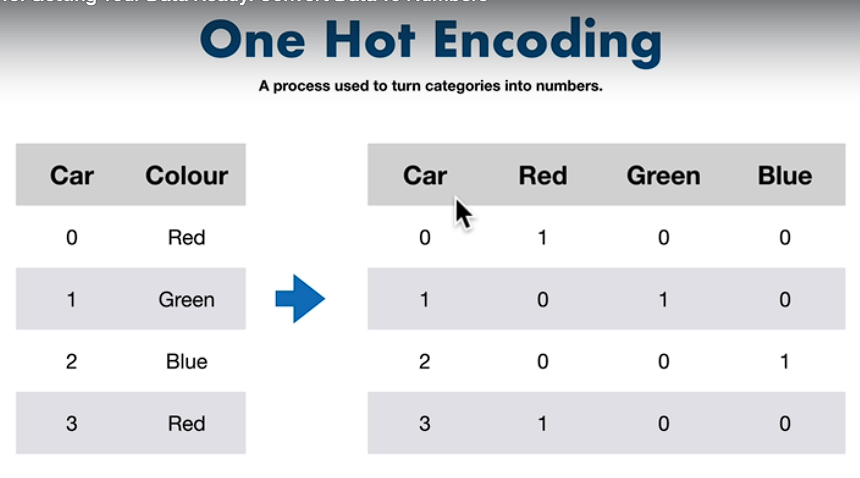

In [23]:
X.Make.value_counts()

Toyota    398
Honda     304
Nissan    198
BMW       100
Name: Make, dtype: int64

In [24]:
X.Colour.value_counts()

White    407
Blue     321
Black     99
Red       94
Green     79
Name: Colour, dtype: int64

In [25]:
X.Doors.value_counts()

4    856
5     79
3     65
Name: Doors, dtype: int64

In [26]:
# Total 13 columns including Odometer

### One more way to convert categories into numericals


In [27]:
dummies = pd.get_dummies(car_sales_data[["Make", "Colour", "Doors", "Odometer (KM)"]])
dummies.head()

Doors  Odometer (KM)  Make_BMW  Make_Honda  Make_Nissan  Make_Toyota  \
0      4          35431         0           1            0            0   
1      5         192714         1           0            0            0   
2      4          84714         0           1            0            0   
3      4         154365         0           0            0            1   
4      3         181577         0           0            1            0   

   Colour_Black  Colour_Blue  Colour_Green  Colour_Red  Colour_White  
0             0            0             0           0             1  
1             0            1             0           0             0  
2             0            0             0           0             1  
3             0            0             0           0             1  
4             0            1             0           0             0

In [28]:
# Fit the model after conversion
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(transformed_X,
                                                    y,
                                                    test_size=0.2)
model.fit(X_train, y_train)

RandomForestRegressor()

In [29]:
model.score(X_test, y_test)

0.3235867221569877

# Handling Missing values:

### What if there were missing values?

1. Fill them with some values.(Imputation)
2. Remove the samples with missing data altogether.

In [30]:
# Import cas sales missing data
car_sales_missing = pd.read_csv("car-sales-extended-missing-data.csv")
car_sales_missing.head()

Make Colour  Odometer (KM)  Doors    Price
0   Honda  White        35431.0    4.0  15323.0
1     BMW   Blue       192714.0    5.0  19943.0
2   Honda  White        84714.0    4.0  28343.0
3  Toyota  White       154365.0    4.0  13434.0
4  Nissan   Blue       181577.0    3.0  14043.0

In [31]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [32]:
# Create X and y
X = car_sales_missing.drop("Price", axis = 1)
y = car_sales_missing.Price

In [33]:
# Convert the data to numbers

# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("One_hot",
                                   one_hot,
                                   categorical_features)],
                                   remainder = "passthrough")

transformed_X  = transformer.fit_transform(X)
transformed_X


<1000x16 sparse matrix of type '<class 'numpy.float64'>'
	with 4000 stored elements in Compressed Sparse Row format>

## Fill missing data with Pandas

In [34]:
# Fill the make column
car_sales_missing["Make"].fillna("missing", inplace = True)

# Fill Colour column
car_sales_missing["Colour"].fillna("missing", inplace = True)

# Fill doors column
car_sales_missing["Doors"].fillna(4, inplace = True)

# Fill Odometer column
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(), inplace = True)

In [35]:
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [36]:
# Remove roes with missing price values
car_sales_missing.dropna(inplace=True)

In [37]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [38]:
# Create X and y
X = car_sales_missing.drop("Price", axis = 1)
y = car_sales_missing.Price


# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("One_hot",
                                   one_hot,
                                   categorical_features)],
                                   remainder = "passthrough")

transformed_X  = transformer.fit_transform(car_sales_missing)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

## Fill missing values with Scikit learn:

In [39]:
car_sales_missing = pd.read_csv("car-sales-extended-missing-data.csv")
car_sales_missing.head()

Make Colour  Odometer (KM)  Doors    Price
0   Honda  White        35431.0    4.0  15323.0
1     BMW   Blue       192714.0    5.0  19943.0
2   Honda  White        84714.0    4.0  28343.0
3  Toyota  White       154365.0    4.0  13434.0
4  Nissan   Blue       181577.0    3.0  14043.0

In [40]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [47]:
# Drop the rows with no labels
car_sales_missing.dropna(subset=["Price"], inplace = True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [48]:
# Split into X and y
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]
X.head()

Make Colour  Odometer (KM)  Doors
0   Honda  White        35431.0    4.0
1     BMW   Blue       192714.0    5.0
2   Honda  White        84714.0    4.0
3  Toyota  White       154365.0    4.0
4  Nissan   Blue       181577.0    3.0

In [49]:
y.head()

0    15323.0
1    19943.0
2    28343.0
3    13434.0
4    14043.0
Name: Price, dtype: float64

In [51]:
# Filling missing values = Imputation
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with 'missing' and numerical values with mean
cat_imputer = SimpleImputer(strategy="constant", fill_value="missing")
door_imputer = SimpleImputer(strategy="constant", fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

# Define columns 
cat_features = ["Make", "Colour"]
door_feature = ["Doors"]
num_features = ["Odometer (KM)"]

# Create an imputer (To fill the missing data)

imputer = ColumnTransformer([
    ("cat_imputer",cat_imputer ,cat_features),
    ("door_imputer", door_imputer, door_feature),
    ("num_imputer", num_imputer, num_features)
])

# Transform the data
filled_X = imputer.fit_transform(X)
filled_X

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [53]:
car_sales_filled = pd.DataFrame(filled_X, 
                    columns = ["Make", "Colour", "Doors", "Odometer (KM)"])
car_sales_filled.head()

Make Colour Doors Odometer (KM)
0   Honda  White   4.0       35431.0
1     BMW   Blue   5.0      192714.0
2   Honda  White   4.0       84714.0
3  Toyota  White   4.0      154365.0
4  Nissan   Blue   3.0      181577.0

In [54]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [55]:
# Convert the data to numbers

# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("One_hot",
                                   one_hot,
                                   categorical_features)],
                                   remainder = "passthrough")

transformed_X  = transformer.fit_transform(car_sales_filled)
transformed_X

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [56]:
# Now we got the data as numbers and filled
# Let's fit the model

np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(transformed_X,
                                                    y,
                                                    test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.21990196728583944

The more data we have, the better results we can produce.

In [57]:
what_we_are_covering

['0. An end-to-end Scikit-Learn worfklow',
 '1. Getting the data ready',
 '2. Choosing the right maching learning estimator/aglorithm/model for your problem',
 '3. Fitting your chosen machine learning model to data and using it to make a prediction',
 '4. Evaluting a machine learning model',
 '5. Improving predictions through experimentation (hyperparameter tuning)',
 '6. Saving and loading a pretrained model',
 '7. Putting it all together in a pipeline']

# Choosing the right ML model:
 * sklearn = scikit_learn refers to ML models, algorithms as estimators.
 * Classification problem - Predicting a category (heart disease or not)
     * Sometimes we use 'clf'- short form of classification
 * Regression problem - Predicting a number (Car price)
 
 https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

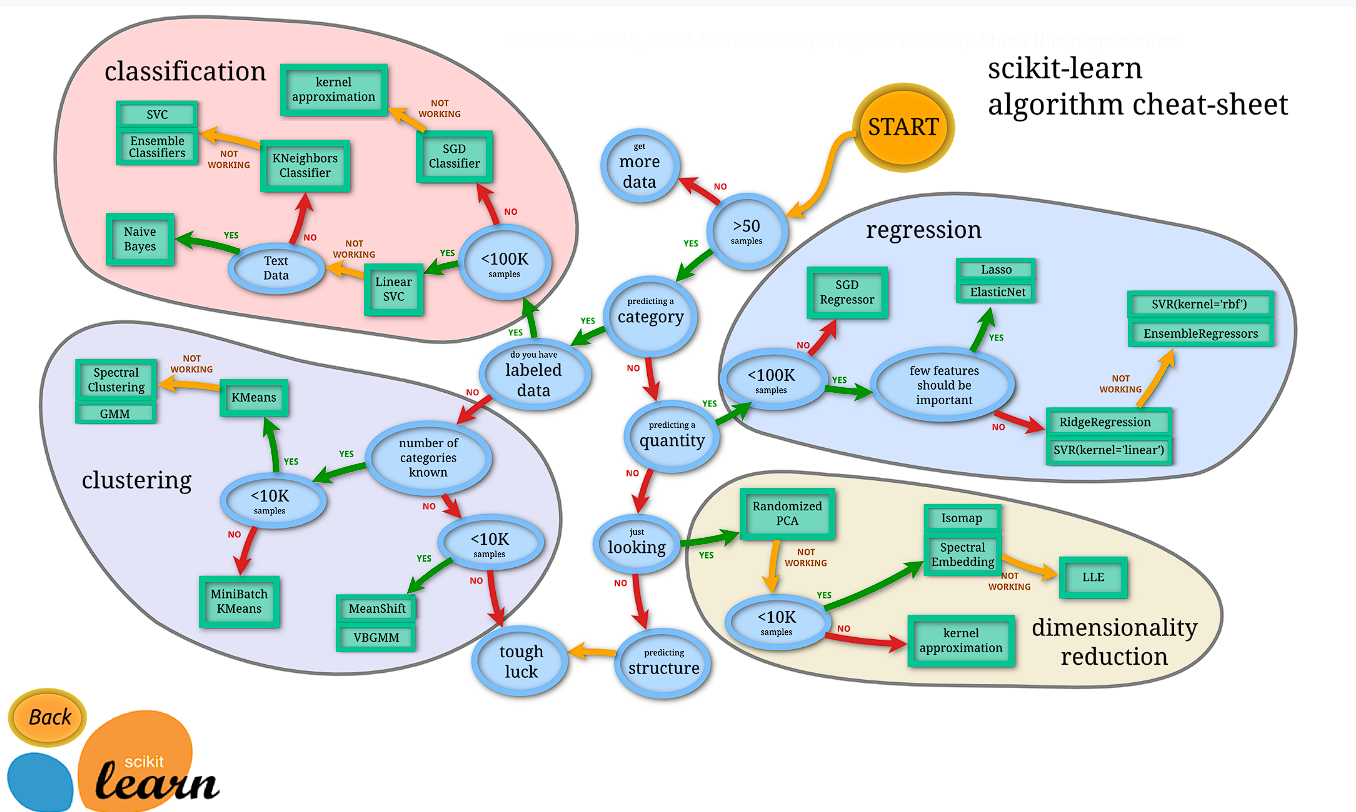

## 2. Choosing the right estimator/algorithm for your problem

Once you've got your data ready, the next step is to choose an appropriate machine learning algorithm or model to find patterns in your data.

Some things to note:
* Sklearn refers to machine learning models and algorithms as estimators.
* Classification problem - predicting a category (heart disease or not).
    * Sometimes you'll see `clf` (short for classifier) used as a classification estimator instance's variable name.
* Regression problem - predicting a number (selling price of a car).
* Unsupervised problem - clustering (grouping unlabelled samples with other similar unlabelled samples).

If you know what kind of problem you're working with, one of the next places you should look at is the [Scikit-Learn algorithm cheatsheet](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html).

This cheatsheet gives you a bit of an insight into the algorithm you might want to use for the problem you're working on.

It's important to remember, you don't have to explicitly know what each algorithm is doing on the inside to start using them. If you do start to apply different algorithms but they don't seem to be working, that's when you'd start to look deeper into each one.

You can see it's split into four main categories. Regression, classification, clustering and dimensionality reduction. Each has their own different purpose but the Scikit-Learn team has designed the library so the workflows for each are relatively similar.

Let's start with a regression problem (trying to predict a number). We'll use the [California Housing dataset](https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset) built into Scikit-Learn's `datasets` module.

The goal of the California Housing dataset is to predict a given district's median house value (in hundreds of thousands of dollars) on things like the age of the home, the number of rooms, the number of bedrooms, number of people living the home and more.

### 2.1 Picking a machine learning model for a regression problem

In [61]:
# Get california housing dataset
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [64]:
housing_df = pd.DataFrame(housing["data"], columns = housing["feature_names"])
housing_df

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  
0        -122.23  
1        -122.22  
2        -122.24  
3        -122.25  
4        -122.25  
...          ...  
20635    -121.09  
20636    -121.21  
20637    -121.22  
20638    -121.32  
20639    -121.24  

[20640 rows x 8 columns]

* `MedInc` - median income in block group
* `HouseAge` - median house age in block group
* `AveRooms` - average number of rooms per household
* `AveBedrms` - average number of bedrooms per household

To predict the `target` column which expresses the median house value for specfici California districts in hundreds of thousands of dollars ($100,000). 

In [66]:
housing_df["target"] = housing["target"]
housing_df.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  target  
0    -122.23        4.526   4.526  
1    -122.22        3.585   3.585  
2    -122.24        3.521   3.521  
3    -122.25        3.413   3.413  
4    -122.25        3.422   3.422

In [67]:
housing_df.drop("MedHouseVal",axis = 1, inplace = True)
housing_df.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422

In [68]:
# Import algorithms and experiment with differnt algorithms

# Setup random seed
np.random.seed(42)

# Splitting data into X and y
X = housing_df.drop("target", axis=1)
y = housing_df["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

# Instantiate and fit the model (on the training set)
from sklearn.linear_model import Ridge 

model = Ridge()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.5758549611440127

### How can we improve the model? 
* 1. Get more data
* 2. Try a different model
* 3. Hyper parameter tuning 


Following the diagram, the next step would be to try [`EnsembleRegressors`](https://scikit-learn.org/stable/modules/ensemble.html). Ensemble is another word for multiple models put together to make a decision.

One of the most common and useful ensemble methods is the [Random Forest](https://scikit-learn.org/stable/modules/ensemble.html#forest). Known for its fast training and prediction times and adaptibility to different problems.

The basic premise of the Random Forest is to combine a number of different decision trees, each one random from the other and make a prediction on a sample by averaging the result of each decision tree.

An in-depth discussion of the Random Forest algorithm is beyond the scope of this notebook but if you're interested in learning more, [An Implementation and Explanation of the Random Forest in Python](https://towardsdatascience.com/an-implementation-and-explanation-of-the-random-forest-in-python-77bf308a9b76) by Will Koehrsen is a great read.

Since we're working with regression, we'll use Scikit-Learn's [`RandomForestRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html).

We can use the exact same workflow as above. Except for changing the model.

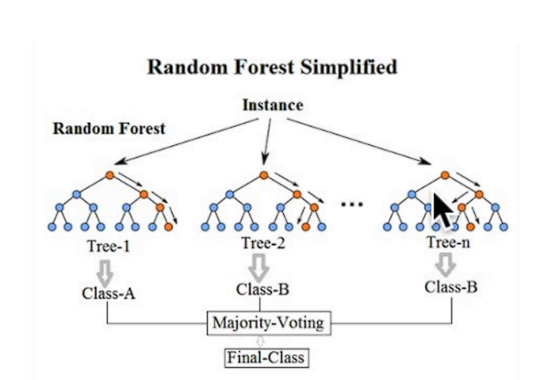

In [69]:
# Trying RandomForestRegressor

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8065734772187598

## Picking a ML model for a classification problem

In [70]:
heart_disease_data.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [71]:
# Splitting X and y
X = heart_disease_data.drop("target", axis=1)
y = heart_disease_data["target"]

#Splitting into train and test data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

# Import the model
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7868852459016393

In [72]:
from sklearn.svm import LinearSVC
model = LinearSVC()
model.fit(X_train, y_train)
model.score(X_test, y_test)

C:\Users\reeth\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.45901639344262296

A little tidbit for modelling in machine learning is:
* If you have structured data (tables or dataframes), use ensemble methods, such as, a Random Forest.
* If you have unstructured data (text, images, audio, things not in tables), use deep learning or transfer learning.


## 3. Fit the model to data and using it to make predictions

Now you've chosen a model, the next step is to have it learn from the data so it can be used for predictions in the future.

If you've followed through, you've seen a few examples of this already.

### 3.1 Fitting a model to data

In Scikit-Learn, the process of having a machine learning model learn patterns from a dataset involves calling the `fit()` method and passing it data, such as, `fit(X, y)`.

Where `X` is a feature array and `y` is a target array.

Other names for `X` include:
* Data
* Feature variables
* Features

Other names for `y` include:
* Labels
* Target variable

For supervised learning there is usually an `X` and `y`. For unsupervised learning, there's no `y` (no labels).

Let's revisit the example of using patient data (`X`) to predict whether or not they have heart disease (`y`).

In [74]:
# Splitting X and y
X = heart_disease_data.drop("target", axis=1)
y = heart_disease_data["target"]

#Splitting into train and test data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

# Import the model
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train) 
# Model finds the patterns during the fit process and Uses those patterns during the score process
model.score(X_test, y_test)

0.8032786885245902